In [1]:
import sys
sys.path.append('../..')

import src.Auth as Auth
import utils.utils as utils
import numpy as np
import matplotlib.pyplot as plt


def pop_first_k_elements(arr, k):
    # Validate inputs
    if k < 0:
        raise ValueError("k must be non-negative")
    if k > len(arr):
        raise ValueError("k must not be greater than the number of elements in the array")
    
    return  arr[k:], arr[:k]


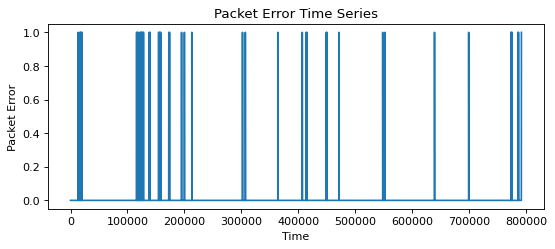

In [2]:
# one indicate packet lost, zero indicate correctly recieved packet
Packet_error = np.fromfile('time_series.csv', sep=',')
plt.figure(figsize=(8, 3), dpi=80)
plt.plot(Packet_error)
plt.title('Packet Error Time Series')
plt.xlabel('Time')
plt.ylabel('Packet Error')
plt.show()

In [13]:
def test_experiment(exp, Packet_error, m_size = 1024, t_size = 256, b =None):
        i = 0
        cnt = 0
        security_rate = 0
        GP= 0
        while len(Packet_error) > exp['parameters']['m_nr']:
                Packet_error, m = pop_first_k_elements(Packet_error, exp['parameters']['m_nr'])
                m = np.power(0, m)
                # m = np.random.choice([0, 1], size=(exp['parameters']['m_nr'],), p=[0.1, 0.9])
                t = np.ones(exp['parameters']['t_nr'])
                # if 0 in m:
                val = Auth.Validate(exp,m, t)
                security_rate += Auth.SecurityRate(exp, m, t, t_size= t_size, b = b )
                GP += Auth.Goodput(exp, m, t, m_size, t_size= b)
                #count where m is 1 but val is zero
                cnt += sum(m)-sum(val>0)
                i+=1

        return {'received but failed to verify': cnt, 'security_rate': security_rate/i, 'GP': GP/i}

In [12]:
experiments = utils.Load_Experiments('../Xs.pkl')
Packet_error = np.random.choice([0, 1], size=(1000000,), p=[0.999, 0.001])
m_size = 1024
t_size = 256
for exp in experiments:
        print('p: ', experiments[exp]['parameters']['p'],',   m_nr: ', experiments[exp]['parameters']['m_nr'], ',   t_nr: ', experiments[exp]['parameters']['t_nr'])
        print(test_experiment(experiments[exp],Packet_error, m_size, t_size = t_size if experiments[exp]['eval']['average_A']< 1 else experiments[exp]['eval']['average_A'], b =t_size))

p:  0.8 ,   m_nr:  10 ,   t_nr:  10


KeyboardInterrupt: 

In [10]:

parameters = {'m_nr':50, 't_nr': 50,
                'p': 0.8, 'q': 1,
                'x': 9}
X = Auth.ProMAC_X(parameters['m_nr'],parameters['x'])
exp = Auth.Create_Experiment(parameters,X= X)

# Packet_error = np.fromfile('time_series2.csv', sep=',')
print(test_experiment(exp,Packet_error, m_size, t_size/parameters['x'], b= t_size))

Status: 1
Objective value: 6.0
{'received but failed to verify': 792, 'security_rate': 0.9120460467466699, 'GP': 0.7985631281561236}


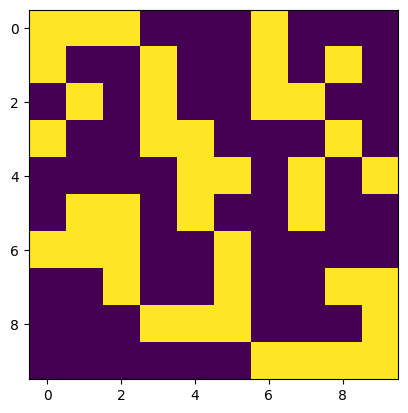

In [154]:
experiments[0]['eval']
plt.imshow(experiments[0]['results']['X'])